In [1]:
from scipy.io.wavfile import read
from scipy.io.wavfile import write

In [2]:
fs,data = read('../sms-tools-master/sounds/piano.wav')

In [3]:
!play '../sms-tools-master/sounds/piano.wav'


../sms-tools-master/sounds/piano.wav:

 File Size: 339k      Bit Rate: 706k
  Encoding: Signed PCM    
  Channels: 1 @ 16-bit   
Samplerate: 44100Hz      
Replaygain: off         
  Duration: 00:00:03.85  

In:100%  00:00:03.85 [00:00:00.00] Out:170k  [      |      ] Hd:4.7 Clip:0    
Done.


In [4]:
print("Sampling rate = ",fs) #samples per second

Sampling rate =  44100


In [5]:
data.size

169600

### Original waveform

In [6]:
import matplotlib.pyplot as plt
import numpy as np

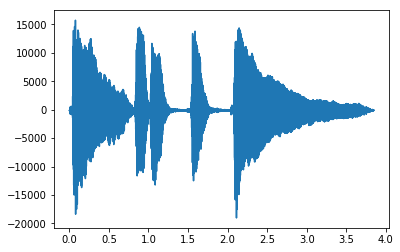

In [7]:
time = np.arange(data.size)/fs
plt.plot(time,data)
plt.show()

### Break signals into frames of 20ms = 0.02s

In [8]:
frame_duration = 0.02
frame_length = frame_duration * fs
N = data.size
num_frames = N//frame_length

#print
print(frame_duration)
print(frame_length)
print(N)
print(num_frames)

0.02
882.0
169600
192.0


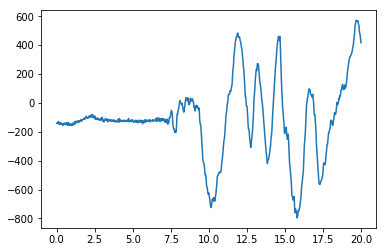

In [9]:
fd = int(frame_duration * 1000)
fl = int(frame_length)

frame1 = data[0:fl]
subT = np.linspace(0, fd, fl)
plt.plot(subT, frame1)
plt.show()

In [10]:
data2 = np.array(data, dtype=object)
squaredData = data2 * data2

#print
print(data2)
print(squaredData)

[-140 -140 -140 ... -126 -123 -126]
[19600 19600 19600 ... 15876 15129 15876]


In [11]:
nof = int(num_frames)
end = int(frame_length)
frameEnergy = np.zeros(nof)

In [12]:
i = 0
for j in range(1, (nof+1)):
    temp = squaredData[(j-1)*end+1 : end*j]
    frameEnergy[i] = sum(temp) 
    i += 1

frameEnergy.size

192

### Frame energy plot

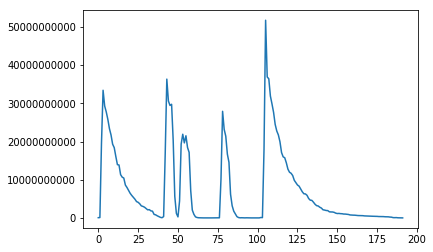

In [13]:
plt.plot(frameEnergy)
plt.ticklabel_format(useOffset=False, style='plain')
plt.show()

In [14]:
min(frameEnergy)

11588848.0

In [15]:
frameEnergy[frameEnergy<50000000].size

29

### Continuous components with silence removed

In [62]:
remSilence = np.zeros(data.size, dtype=object)
remSilence.size

169600

In [64]:
thresh = 60000000
j = 0
for i in range(frameEnergy.size):
    if frameEnergy[i] > thresh:
        remSilence[(fl*j):(fl*(j+1))] = data[(fl*i):(fl*(i+1))]
        j+=1
    else:
        continue

In [65]:
remSilence

array([-140, -140, -140, ..., 0, 0, 0], dtype=object)

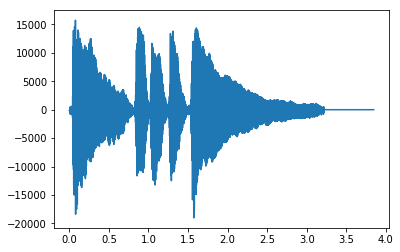

In [66]:
plt.plot(time,remSilence)
plt.show()

### Components seperated by complete silence

In [67]:
trimSilence = np.zeros(data.size, dtype=object)
trimSilence.size

169600

In [68]:
for i in range(frameEnergy.size):
    if frameEnergy[i] > thresh:
        trimSilence[(fl*i):(fl*(i+1))] = data[(fl*i):(fl*(i+1))]
        j+=1
    else:
        continue

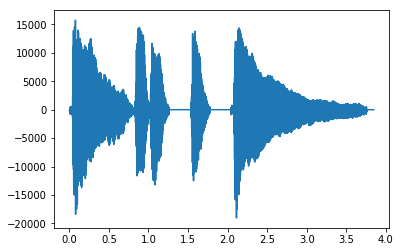

In [69]:
plt.plot(time,trimSilence)
plt.show()

In [70]:
silenceRemoved = np.array(remSilence, dtype='int16')
write('silenceRemoved.wav',fs,silenceRemoved)

In [71]:
silenceSuppressed = np.array(test2, dtype='int16')
write('silenceSuppressed.wav',fs,silenceSuppressed)

In [25]:
#!play '../sms-tools-master/sounds/piano.wav'

In [26]:
#!play 'silenceRemoved.wav'

In [27]:
#!play 'silenceSuppressed.wav'

### Track splitting

In [72]:
#function to perform the splitting
sp = [0]
j = 0
flag = True

def split(track):
    global flag
    def splitStart():
        global j
        global sp
        for i in range(sp[j],track.size):
            if track[i]==0:
                temp = track[i:i+100]
                if temp[temp==0].size==100:
                    sp.append(i)
                    j+=1
                    print('start',sp)
                    break
        return 
                
    def splitEnd():
        global j
        global sp
            
        for i in range(sp[j],track.size):
            if track[i]==0:
                continue
            else:
                sp.append(i)
                j+=1
                print('stop',sp)
                return 1
        return track.size
        
    while flag==True:
        splitStart()
        trackEnd = splitEnd()
        if trackEnd == track.size:
            flag = False

In [73]:
split(trimSilence)

start [0, 55566]
stop [0, 55566, 67914]
start [0, 55566, 67914, 78498]
stop [0, 55566, 67914, 78498, 89964]
start [0, 55566, 67914, 78498, 89964, 165816]


In [74]:
odd = sp[0::2]
even = sp[1::2]
print(odd)
print(even)

[0, 67914, 89964]
[55566, 78498, 165816]


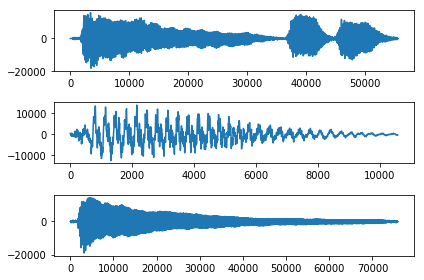

In [75]:
fig, axes = plt.subplots(nrows=3, ncols=1)
l=0
for i,j in zip(odd,even):
    components = trimSilence[i:j]
    axes[l].plot(components)
    l+=1

plt.tight_layout()
plt.show()

In [34]:
test5 = np.array(p1,dtype='int16')
write('split1.wav',44100,test5)

test6 = np.array(p2,dtype='int16')
write('split2.wav',44100,test6)

test7 = np.array(p3,dtype='int16')
write('split3.wav',44100,test7)